In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Data Clean

In [5]:
len(df['User ID'].unique())

400

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [8]:
df.Gender = df.Gender.map({'Male' : 1, 'Female' : 0})

In [9]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [10]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [11]:
q3 = df.Age.quantile(0.75)
q1 = df.Age.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(5.375, 70.375)

In [12]:
q3 = df.EstimatedSalary.quantile(0.75)
q1 = df.EstimatedSalary.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-24500.0, 155500.0)

In [13]:
df.drop(['User ID'], axis = 1, inplace = True)

In [14]:
df.shape

(400, 4)

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(380, 4)

In [17]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [28]:
from sklearn.model_selection import train_test_split

X = df[['Gender', 'Age', 'EstimatedSalary']].values
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 786)

**Feature Scaling**

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [31]:
knn.score(X_train, y_train)

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9172932330827067

In [32]:
knn.score(X_test, y_test)

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8859649122807017

**Making the Confusion Matrix**

In [43]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
for i in range(1,60) :
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    print('K - Value : ', i, 'Train Score : ', knn.score(X_train, y_train), 'cv score : ', np.mean(cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'roc_auc')))

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  1 Train Score :  0.9962406015037594 cv score :  0.8447712418300654
K - Value :  2 Train Score :  0.924812030075188 cv score :  0.8960530137981119
K - Value :  3 Train Score :  0.9285714285714286 cv score :  0.9109295570079883
K - Value :  4 Train Score :  0.9135338345864662 cv score :  0.9247785039941903
K - Value :  5 Train Score :  0.9172932330827067 cv score :  0.9233660130718955
K - Value :  6 Train Score :  0.9135338345864662 cv score :  0.9335584604212055


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  7 Train Score :  0.9097744360902256 cv score :  0.9403848946986202
K - Value :  8 Train Score :  0.9097744360902256 cv score :  0.9324473493100944
K - Value :  9 Train Score :  0.9060150375939849 cv score :  0.9336928104575163
K - Value :  10 Train Score :  0.9022556390977443 cv score :  0.9331336238198983
K - Value :  11 Train Score :  0.9060150375939849 cv score :  0.9342556281771968


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  12 Train Score :  0.9135338345864662 cv score :  0.9339724037763253
K - Value :  13 Train Score :  0.9097744360902256 cv score :  0.9337291212781409
K - Value :  14 Train Score :  0.9135338345864662 cv score :  0.9390450254175745
K - Value :  15 Train Score :  0.9060150375939849 cv score :  0.9391285403050109
K - Value :  16 Train Score :  0.9060150375939849 cv score :  0.9428685548293391


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  17 Train Score :  0.9022556390977443 cv score :  0.9473747276688453
K - Value :  18 Train Score :  0.9097744360902256 cv score :  0.9438126361655774
K - Value :  19 Train Score :  0.9060150375939849 cv score :  0.946949891067538
K - Value :  20 Train Score :  0.9022556390977443 cv score :  0.9455119825708062
K - Value :  21 Train Score :  0.8984962406015038 cv score :  0.9428685548293393
K - Value :  22 Train Score :  0.8571428571428571 cv score :  0.9404393609295569
K - Value :  23 Train Score :  0.8609022556390977 cv score :  0.9429012345679013
K - Value :  24 Train Score :  0.8571428571428571 cv score :  0.9433079157588962
K - Value :  25 Train Score :  0.8609022556390977 cv score :  0.9436347131445171


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  26 Train Score :  0.849624060150376 cv score :  0.9421314451706608
K - Value :  27 Train Score :  0.849624060150376 cv score :  0.9412490922294843
K - Value :  28 Train Score :  0.8421052631578947 cv score :  0.9391902687000726
K - Value :  29 Train Score :  0.8421052631578947 cv score :  0.9369680464778505


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  30 Train Score :  0.8421052631578947 cv score :  0.9375889615105301
K - Value :  31 Train Score :  0.8421052631578947 cv score :  0.9365940450254175
K - Value :  32 Train Score :  0.8421052631578947 cv score :  0.9358641975308641
K - Value :  33 Train Score :  0.8421052631578947 cv score :  0.9361619462599855
K - Value :  34 Train Score :  0.8308270676691729 cv score :  0.9362273057371097


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  35 Train Score :  0.8383458646616542 cv score :  0.9362563543936092
K - Value :  36 Train Score :  0.8270676691729323 cv score :  0.9366013071895425
K - Value :  37 Train Score :  0.8270676691729323 cv score :  0.9365686274509804
K - Value :  38 Train Score :  0.8120300751879699 cv score :  0.936909949164851
K - Value :  39 Train Score :  0.8157894736842105 cv score :  0.9355555555555556


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  40 Train Score :  0.8082706766917294 cv score :  0.9353558460421205
K - Value :  41 Train Score :  0.8120300751879699 cv score :  0.9352396514161221
K - Value :  42 Train Score :  0.7819548872180451 cv score :  0.9334640522875818
K - Value :  43 Train Score :  0.7857142857142857 cv score :  0.9313543936092955


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  44 Train Score :  0.7781954887218046 cv score :  0.9304575163398694
K - Value :  45 Train Score :  0.7819548872180451 cv score :  0.9276143790849674
K - Value :  46 Train Score :  0.7631578947368421 cv score :  0.9285947712418301
K - Value :  47 Train Score :  0.7631578947368421 cv score :  0.9277305737109659
K - Value :  48 Train Score :  0.7593984962406015 cv score :  0.9258387799564269


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  49 Train Score :  0.7631578947368421 cv score :  0.924041394335512
K - Value :  50 Train Score :  0.7443609022556391 cv score :  0.9215867828612927
K - Value :  51 Train Score :  0.7518796992481203 cv score :  0.9215904139433551
K - Value :  52 Train Score :  0.7368421052631579 cv score :  0.9222621641249094


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  53 Train Score :  0.7406015037593985 cv score :  0.9210566448801742
K - Value :  54 Train Score :  0.7368421052631579 cv score :  0.9250254175744372
K - Value :  55 Train Score :  0.7406015037593985 cv score :  0.924927378358751
K - Value :  56 Train Score :  0.7330827067669173 cv score :  0.9237182280319536


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K - Value :  57 Train Score :  0.7368421052631579 cv score :  0.9223493100944081
K - Value :  58 Train Score :  0.7330827067669173 cv score :  0.9224110384894699
K - Value :  59 Train Score :  0.7368421052631579 cv score :  0.9212672476397966


C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

K = 17 is best value

In [44]:
knn = KNeighborsClassifier(17) 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [45]:
knn.score(X_train, y_train)

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9022556390977443

In [46]:
knn.score(X_test, y_test)

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8771929824561403

In [47]:
from sklearn.metrics import f1_score, accuracy_score, plot_roc_curve, confusion_matrix

In [50]:
y_predict = knn.predict(X_test)

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
f1_score(y_test, y_predict)

0.8409090909090908

In [52]:
confusion_matrix(y_test, y_predict)

array([[63,  5],
       [ 9, 37]], dtype=int64)

C:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


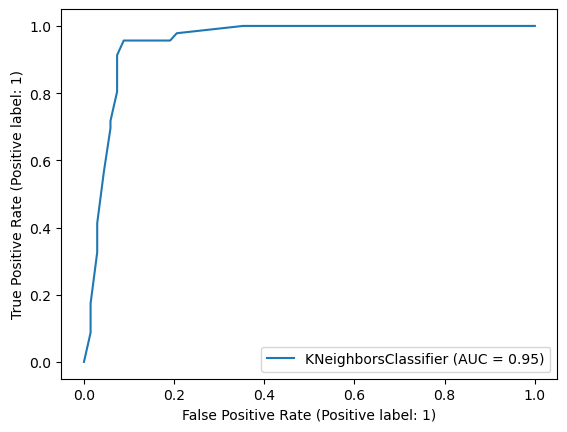

In [49]:
plot_roc_curve(knn, X_test, y_test)